## 1. first download the data from the internet, save ERS information as CSVs 

   ### 1a. (keep excel versions though to document variable names)

## 2. load the data:


In [1]:
import pandas as pd
import numpy as np

In [2]:
late_stage_by_county0 = pd.read_csv("/Users/sophie/Desktop/CS_data/late_stage_by_county.csv")

In [3]:
education0 = pd.read_csv("/Users/sophie/Desktop/CS_data/Education.csv")

In [4]:
poverty0 = pd.read_csv("/Users/sophie/Desktop/CS_data/poverty.csv")

In [5]:
population0 = pd.read_csv("/Users/sophie/Desktop/CS_data/PopulationEstimates.csv")

In [6]:
unemployment_median_income0 = pd.read_csv("/Users/sophie/Desktop/CS_data/unemployment_median_income.csv")

## 3. clean the data:

### breast cancer data:

In [7]:
#starting with the breast cancer data:

#late_stage_by_county0.head(15)

#drop extra rows at top:
late_stage_by_county1 = late_stage_by_county0.iloc[8:, :]

In [8]:
#make column names the headers:
late_stage_by_county1.columns = late_stage_by_county0.iloc[7]

In [9]:
#make row names the row names:
late_stage_by_county1.set_index("State", inplace = True)
#late_stage_by_county1.drop('State', axis=1)
# print(late_stage_by_county1.index)

In [10]:
#take out columns we don't want data from
col_names = []
for col in late_stage_by_county1.columns:
    col_names.append(col)
#print(col_names)

late_stage_by_county1.drop(col_names[0], axis=1, inplace=True) #FIPS
late_stage_by_county1.drop(col_names[1], axis=1, inplace=True) #Met Healthy People Objective
late_stage_by_county1.drop(col_names[3], axis=1, inplace=True) #Lower CI
late_stage_by_county1.drop(col_names[4], axis=1, inplace=True) #Upper CI
late_stage_by_county1.drop(col_names[5], axis=1, inplace=True) #CI Rank
late_stage_by_county1.drop(col_names[6], axis=1, inplace=True) #Lower CI Rank
late_stage_by_county1.drop(col_names[7], axis=1, inplace=True) #Upper CI Rank

/Users/sophie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
#drop NaN's
late_stage_by_county1 = late_stage_by_county1.replace('*', np.nan) #to take out N/A values as documented by NIH
late_stage_by_county1 = late_stage_by_county1.replace('data not available', np.nan)
late_stage_by_county1 = late_stage_by_county1.dropna()
#late_stage_by_county1.head(20)

In [12]:
#late_stage_by_county1.tail(50)

In [13]:
#collect list of counties to pull from other data:
counties_included = []
for place_name in late_stage_by_county1.index:
    if "County" in place_name:
        counties_included.append(place_name[:-3]) #removes number in parentheses from NIH documentation

In [14]:
#print(counties_included)
late_stage_by_county1

7,"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Average Annual Count,Percent of Cases with Late Stage
State,,,
US (SEER+NPCR)(1),41.7,79558,31.9
"Abbeville County, South Carolina(6)",50.2,8,39.8
"Acadia Parish, Louisiana(7)",36.5,13,32.0
"Accomack County, Virginia(6)",62.8,14,42.9
"Ada County, Idaho(7)",44.6,108,29.9
...,...,...,...
"York County, South Carolina(6)",38.3,59,29.0
"York County, Virginia(6)",41.5,17,33.6
"Young County, Texas(6)",31.5,4,32.8


In [15]:
cleaned_county_names = []
state_names = []

for place in late_stage_by_county1.index:
    split_name = place.split(", ")
    cleaned_county_names.append(split_name[0])
    if len(split_name) > 1:
        state = split_name[1]
        state_names.append(state[:-3])
    else:
        state_names.append(np.nan)
    
print(cleaned_county_names)

['US (SEER+NPCR)(1)', 'Abbeville County', 'Acadia Parish', 'Accomack County', 'Ada County', 'Adair County', 'Adair County', 'Adair County', 'Adams County', 'Adams County', 'Adams County', 'Adams County', 'Adams County', 'Adams County', 'Adams County', 'Adams County', 'Addison County', 'Aiken County', 'Alachua County', 'Alamance County', 'Alameda County', 'Alamosa County', 'Albany County', 'Albany County', 'Albemarle County', 'Alcorn County', 'Alexander County', 'Alexandria City', 'Allegan County', 'Allegany County', 'Allegany County', 'Allegheny County', 'Allen County', 'Allen County', 'Allen County', 'Allen Parish', 'Alpena County', 'Amador County', 'Amelia County', 'Amherst County', 'Amite County', 'Anchorage Borough', 'Anderson County', 'Anderson County', 'Anderson County', 'Anderson County', 'Andrew County', 'Androscoggin County', 'Angelina County', 'Anne Arundel County', 'Anson County', 'Antrim County', 'Apache County', 'Appanoose County', 'Appling County', 'Appomattox County', 'A

In [16]:
# CITE: https://gist.github.com/rogerallen/1583593

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
    np.nan : "US"
}

state_abrvs = []
for state in state_names:
    abrv = us_state_to_abbrev[state]
    state_abrvs.append(abrv)

In [17]:
late_stage_by_county1["County Name"]= cleaned_county_names
late_stage_by_county1.set_index("County Name", inplace = True)
late_stage_by_county1["State"] = state_abrvs

In [18]:
late_stage_by_county1

7,"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Average Annual Count,Percent of Cases with Late Stage,State
County Name,,,,
US (SEER+NPCR)(1),41.7,79558,31.9,US
Abbeville County,50.2,8,39.8,SC
Acadia Parish,36.5,13,32.0,LA
Accomack County,62.8,14,42.9,VA
Ada County,44.6,108,29.9,ID
...,...,...,...,...
York County,38.3,59,29.0,SC
York County,41.5,17,33.6,VA
Young County,31.5,4,32.8,TX


## woohoo! NIH data is clean! now for affluence data... 


### population data:

In [19]:
population0.head(15)

population1 = population0.iloc[1:-3, :8]

In [20]:
#make column names the headers:
population1.columns = population0.iloc[0, :8]

In [21]:
#make row names the row names:
population1.set_index("Area name", inplace = True)

In [22]:
#take out columns we don't want data from
col_names = []
for col in population1.columns:
    col_names.append(col)
#print(col_names)

population1.drop(col_names[0], axis=1, inplace=True) #FIPS
population1.drop(col_names[2], axis=1, inplace=True) #Rural-urban continuum code 2013
population1.drop(col_names[3], axis=1, inplace=True) #1990 Pop
population1.drop(col_names[4], axis=1, inplace=True) #2000 Pop
population1.drop(col_names[5], axis=1, inplace=True) #2010 Pop

In [23]:
population1.dropna()

,State,Population 2020
Area name,,
United States,US,"331,449,281"
Alabama,AL,"5,024,279"
Autauga County,AL,"58,805"
Baldwin County,AL,"231,767"
Barbour County,AL,"25,223"
...,...,...
Vega Baja Municipio,PR,"54,414"
Vieques Municipio,PR,"8,249"
Villalba Municipio,PR,"22,093"


In [24]:
population1.to_csv("/Users/Sophie/Desktop/pop.csv")

In [25]:
counties_without_state_names = []
for county in counties_included:
    split_name = county.split(", ")
    counties_without_state_names.append(split_name[0])

In [26]:
population1.head(15)

,State,Population 2020
Area name,,
United States,US,"331,449,281"
Alabama,AL,"5,024,279"
Autauga County,AL,"58,805"
Baldwin County,AL,"231,767"
Barbour County,AL,"25,223"
Bibb County,AL,"22,293"
Blount County,AL,"59,134"
Bullock County,AL,"10,357"
Butler County,AL,"19,051"


### poverty data:

In [27]:
poverty0.head(15)

poverty1 = poverty0.iloc[4:, :9]

In [28]:
#make column names the headers:
poverty1.columns = poverty0.iloc[3, :9]

In [29]:
poverty1.head(15)

3,FIPStxt,Stabr,Area_name,Rural-urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2019,CI90LBALL_2019
4,00000,US,United States,NaN,NaN,NaN,NaN,"39,490,096","39,248,096"
5,01000,AL,Alabama,NaN,NaN,NaN,NaN,"747,478","730,491"
6,01001,AL,Autauga County,2,2,2,2,"6,723","5,517"
7,01003,AL,Baldwin County,4,5,3,2,"22,360","18,541"
8,01005,AL,Barbour County,6,6,6,6,"5,909","4,787"
9,01007,AL,Bibb County,1,1,1,1,"4,101","3,225"
10,01009,AL,Blount County,1,1,1,1,"9,324","8,037"
11,01011,AL,Bullock County,6,6,6,6,"2,537","1,834"
12,01013,AL,Butler County,6,6,6,6,"4,124","3,204"
13,01015,AL,Calhoun County,3,2,3,2,"18,988","15,924"


In [30]:
#make row names the row names:
poverty1.set_index("Area_name", inplace = True)

In [31]:
state_names = poverty1.Stabr
state_names.to_frame()

,Stabr
Area_name,
United States,US
Alabama,AL
Autauga County,AL
Baldwin County,AL
Barbour County,AL
...,...
Sweetwater County,WY
Teton County,WY
Uinta County,WY


In [32]:
poverty1 = poverty1.POVALL_2019
poverty1 = poverty1.to_frame()
poverty1["State"] = state_names

In [33]:
poverty1

,POVALL_2019,State
Area_name,,
United States,"39,490,096",US
Alabama,"747,478",AL
Autauga County,"6,723",AL
Baldwin County,"22,360",AL
Barbour County,"5,909",AL
...,...,...
Sweetwater County,"3,453",WY
Teton County,"1,396",WY
Uinta County,"1,699",WY


In [34]:
poverty1.head(15)

,POVALL_2019,State
Area_name,,
United States,"39,490,096",US
Alabama,"747,478",AL
Autauga County,"6,723",AL
Baldwin County,"22,360",AL
Barbour County,"5,909",AL
Bibb County,"4,101",AL
Blount County,"9,324",AL
Bullock County,"2,537",AL
Butler County,"4,124",AL


### education:

In [35]:
education0.head(15)

education1 = education0.iloc[4:, :]
education1.columns = education0.iloc[3, :]
education1.set_index("Area name", inplace = True)

education1.head(15)

3,FIPS Code,State,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
Area name,,,,,,,,,,,,,,,,,,,,,
United States,00000,US,NaN,NaN,NaN,NaN,"52,373,312","34,158,051","11,650,730","11,717,266",...,27.4,24.4,"26,472,261","59,472,748","63,756,905","70,920,162",12.0,27.0,28.9,32.1
Alabama,01000,AL,NaN,NaN,NaN,NaN,"1,062,306","468,269","136,287","141,936",...,25.9,19.0,"458,922","1,022,839","993,344","845,772",13.8,30.8,29.9,25.5
Autauga County,01001,AL,2,2,2,2,"6,611","3,757",933,767,...,26.9,18.0,"4,291","12,551","10,596","9,929",11.5,33.6,28.4,26.6
Baldwin County,01003,AL,4,5,3,2,"18,726","8,426","2,334","2,038",...,29.3,23.1,"13,893","41,797","47,274","48,148",9.2,27.7,31.3,31.9
Barbour County,01005,AL,6,6,6,6,"8,120","2,242",581,861,...,21.3,10.9,"4,812","6,396","4,676","2,080",26.8,35.6,26.0,11.6
Bibb County,01007,AL,1,1,1,1,"5,272","1,402",238,302,...,20.4,7.1,"3,386","7,256","3,848","1,678",20.9,44.9,23.8,10.4
Blount County,01009,AL,1,1,1,1,"10,677","3,440",626,404,...,24.8,9.6,"7,763","13,299","13,519","5,210",19.5,33.4,34.0,13.1
Bullock County,01011,AL,6,6,6,6,"4,245",958,305,314,...,17.5,7.7,"1,798","2,860","1,587",856,25.3,40.3,22.3,12.1
Butler County,01013,AL,6,6,6,6,"8,353","2,459",499,541,...,22.9,10.4,"2,066","6,244","3,279","2,230",15.0,45.2,23.7,16.1


In [36]:
edu_col_names = []
for col in education1.columns:
    edu_col_names.append(col)

education1 = education1.drop(columns = edu_col_names[2:-4])
education1 = education1.drop(columns = "FIPS Code")

In [37]:
education1 = education1.dropna()

In [38]:
education1.head(15)

3,State,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
Area name,,,,,
United States,US,12.0,27.0,28.9,32.1
Alabama,AL,13.8,30.8,29.9,25.5
Autauga County,AL,11.5,33.6,28.4,26.6
Baldwin County,AL,9.2,27.7,31.3,31.9
Barbour County,AL,26.8,35.6,26.0,11.6
Bibb County,AL,20.9,44.9,23.8,10.4
Blount County,AL,19.5,33.4,34.0,13.1
Bullock County,AL,25.3,40.3,22.3,12.1
Butler County,AL,15.0,45.2,23.7,16.1


### median household income and unemployment:

In [39]:
unemployment_median_income0.head(15)

unemployment_median_income1 = unemployment_median_income0.iloc[4:, :]
unemployment_median_income1.columns = unemployment_median_income0.iloc[3, :]
unemployment_median_income1.set_index("Area_name", inplace = True)


In [40]:
unemp_median_income_col_names = []
for col in unemployment_median_income1.columns:
    unemp_median_income_col_names.append(col)
    
#print(unemp_median_income_col_names)

unemployment_median_income1 = unemployment_median_income1.drop(columns = unemp_median_income_col_names[2:-7])
unemployment_median_income1 = unemployment_median_income1.drop(columns = "FIPS_Code")
unemployment_median_income1 = unemployment_median_income1.drop(columns = unemp_median_income_col_names[-1])
unemployment_median_income1 = unemployment_median_income1.drop(columns = unemployment_median_income1.columns[2:6])

In [41]:
cleaned_county_names = []
state_names = []

for place in unemployment_median_income1.index:
    split_name = place.split(", ")
    cleaned_county_names.append(split_name[0])
    if len(split_name) > 1:
        state = split_name[1]
        state_names.append(state[:-3])
    else:
        state_names.append(np.nan)
    
# print(cleaned_county_names)

In [42]:
unemployment_median_income1["County Name"]= cleaned_county_names
unemployment_median_income1.set_index("County Name", inplace = True)
unemployment_median_income1["State Name"] = state_names

In [43]:
unemployment_median_income1 = unemployment_median_income1.dropna()

In [44]:
unemployment_median_income1.drop(columns = "State Name")

3,State,Unemployment_rate_2019,Median_Household_Income_2019
County Name,,,
Autauga County,AL,2.7,"58,233"
Baldwin County,AL,2.8,"59,871"
Barbour County,AL,3.8,"35,972"
Bibb County,AL,3.1,"47,918"
Blount County,AL,2.7,"52,902"
...,...,...,...
Sweetwater County,WY,4.0,"80,639"
Teton County,WY,2.8,"98,837"
Uinta County,WY,4.0,"70,756"


In [45]:
unemployment_median_income1

3,State,Unemployment_rate_2019,Median_Household_Income_2019,State Name
County Name,,,,
Autauga County,AL,2.7,"58,233",
Baldwin County,AL,2.8,"59,871",
Barbour County,AL,3.8,"35,972",
Bibb County,AL,3.1,"47,918",
Blount County,AL,2.7,"52,902",
...,...,...,...,...
Sweetwater County,WY,4.0,"80,639",
Teton County,WY,2.8,"98,837",
Uinta County,WY,4.0,"70,756",


## Now lets compile a big data set, with only counties that are included across all 5

In [46]:
def list_of_locations(df):
    states = df.State
    locs = []
    for i in range(len(states)):
        locs.append((df.index[i], states[i]))
    df["County_State"] = locs
    return locs

In [47]:
breast_cancer_locs = set(list_of_locations(late_stage_by_county1))
population_locs = set(list_of_locations(population1))
education_locs = set(list_of_locations(education1))
poverty_locs = set(list_of_locations(poverty1))
unemp_median_income_locs = set(list_of_locations(unemployment_median_income1))

In [48]:
all_included_locs = breast_cancer_locs.intersection(population_locs)
all_included_locs = all_included_locs.intersection(education_locs)
all_included_locs = all_included_locs.intersection(poverty_locs)
all_included_locs = all_included_locs.intersection(unemp_median_income_locs)

#print(len(all_included_locs))

In [49]:
#go through each df and drop any rows that aren't included in the compiled list
#make a new column in each df with NaN for any county not in all 5

def NA_columns(df):
    new_col = []
    for tup in df.County_State:
        if tup in all_included_locs:
            new_col.append(0)
        else:
            new_col.append(np.nan)
    df["Included"] = new_col 

In [50]:
NA_columns(late_stage_by_county1)
NA_columns(population1)
NA_columns(education1)
NA_columns(poverty1)
NA_columns(unemployment_median_income1)

In [51]:
late_stage_by_county1 = late_stage_by_county1.dropna()
population1 = population1.dropna()
education1 = education1.dropna()
poverty1 = poverty1.dropna()
unemployment_median_income1 = unemployment_median_income1.dropna()

#late_stage_by_county1.sort_index

In [52]:
all_data = pd.merge(late_stage_by_county1, population1, on = "County_State")
all_data = pd.merge(all_data, education1, on = "County_State")
all_data = pd.merge(all_data, poverty1, on = "County_State")
all_data = pd.merge(all_data, unemployment_median_income1, on = "County_State")
all_data = all_data.drop(columns = ["Included_x","Included_y", "State_x", "State_y", "Included", "State Name", "State" ])

all_data.set_index("County_State", inplace = True)
all_data

/var/folders/rz/tp6krlvs68z_zt9b6t9sk95c0000gn/T/ipykernel_64014/665729393.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'State_x', 'Included_x'} in the result is deprecated and will raise a MergeError in a future version.
  all_data = pd.merge(all_data, poverty1, on = "County_State")


,"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Average Annual Count,Percent of Cases with Late Stage,Population 2020,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",POVALL_2019,Unemployment_rate_2019,Median_Household_Income_2019
County_State,,,,,,,,,,,
"(Abbeville County, SC)",50.2,8,39.8,"24,295",18.3,34.0,32.0,15.6,"3,508",3.2,"46,499"
"(Acadia Parish, LA)",36.5,13,32.0,"57,576",21.0,41.3,24.3,13.3,"12,365",5.1,"44,728"
"(Accomack County, VA)",62.8,14,42.9,"33,413",18.5,36.7,25.3,19.5,"5,225",3.4,"47,335"
"(Ada County, ID)",44.6,108,29.9,"494,967",4.8,22.4,34.3,38.5,"44,023",2.4,"72,295"
"(Adair County, KY)",43.7,5,37.9,"18,903",20.4,39.0,24.9,15.7,"3,832",5.2,"37,650"
...,...,...,...,...,...,...,...,...,...,...,...
"(York County, SC)",38.3,59,29.0,"282,090",9.2,25.1,32.4,33.3,"23,679",2.7,"68,468"
"(York County, VA)",41.5,17,33.6,"70,045",5.3,18.9,28.7,47.1,"3,441",2.6,"91,535"
"(Young County, TX)",31.5,4,32.8,"17,867",17.0,33.7,30.0,19.3,"2,405",3.0,"52,643"


In [53]:
## plot age adjusted incidence rate to see how theyre distributed- read lit to see whats high vs. low
## once we have cutoffs, create target array to feed into model
## start w linear- email lucian once we have results to figure out optimal modeling techniques

## WOOHOO! Data Set is cleaned and compiled!

### now... we need to run a correlation on the data to ensure we will see results

In [54]:
def replace_strings(col_name):
    new_col = []
    for num in all_data[col_name]:
        new_col.append(float(num.replace(',', '')))
    all_data[col_name] = new_col

# replace_strings("Population 2020")
# replace_strings("POVALL_2019")
# replace_strings("Median_Household_Income_2019")

for col in all_data.columns:
    replace_strings(col)

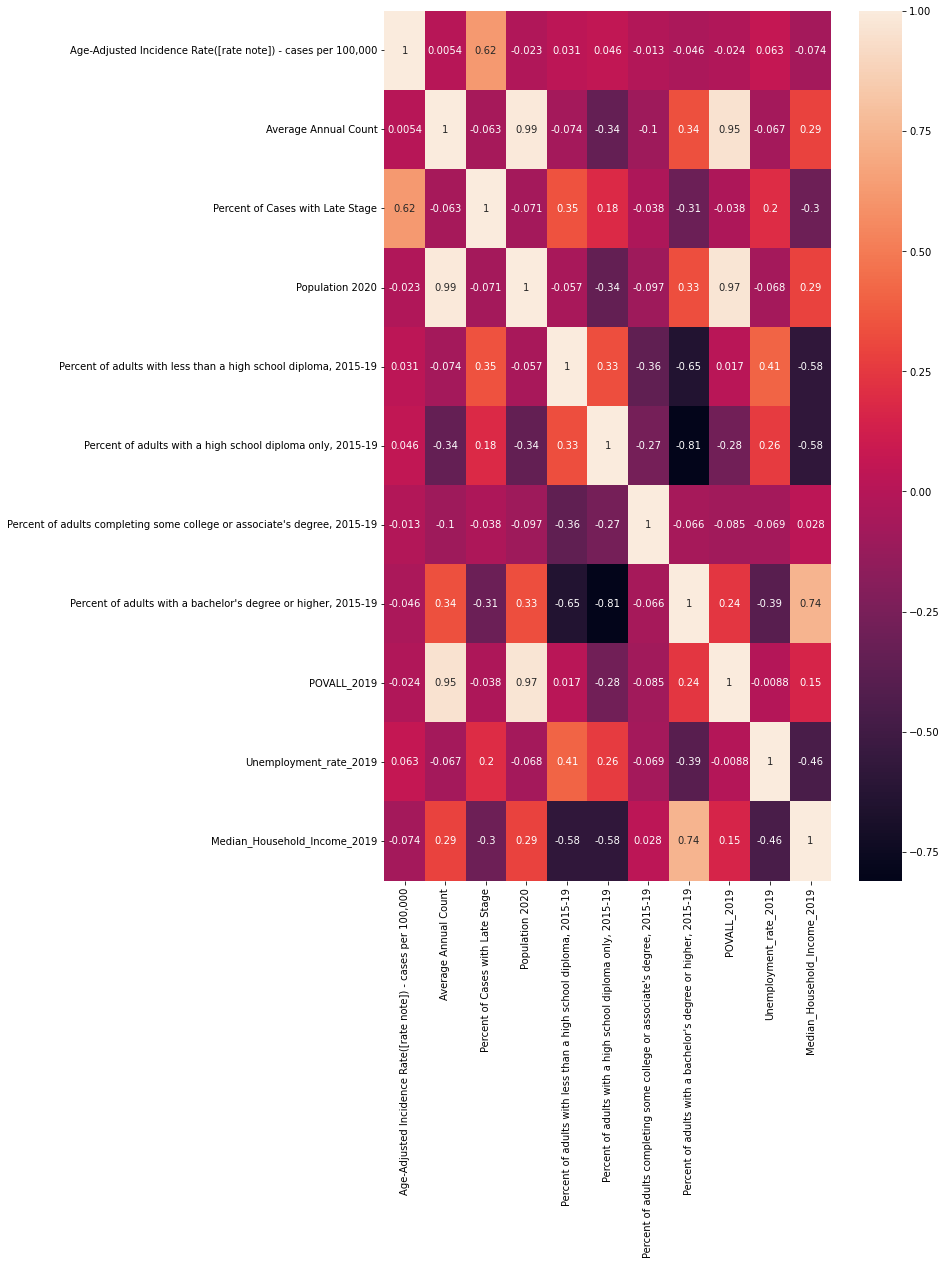

In [55]:
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = all_data.corr()
#print(corr_matrix)

plt.figure(figsize = (10,16))
sn.heatmap(corr_matrix, annot=True)
plt.show()

## Now to apply a multivariate linear regression...

In [56]:
all_data

,"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Average Annual Count,Percent of Cases with Late Stage,Population 2020,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",POVALL_2019,Unemployment_rate_2019,Median_Household_Income_2019
County_State,,,,,,,,,,,
"(Abbeville County, SC)",50.2,8.0,39.8,24295.0,18.3,34.0,32.0,15.6,3508.0,3.2,46499.0
"(Acadia Parish, LA)",36.5,13.0,32.0,57576.0,21.0,41.3,24.3,13.3,12365.0,5.1,44728.0
"(Accomack County, VA)",62.8,14.0,42.9,33413.0,18.5,36.7,25.3,19.5,5225.0,3.4,47335.0
"(Ada County, ID)",44.6,108.0,29.9,494967.0,4.8,22.4,34.3,38.5,44023.0,2.4,72295.0
"(Adair County, KY)",43.7,5.0,37.9,18903.0,20.4,39.0,24.9,15.7,3832.0,5.2,37650.0
...,...,...,...,...,...,...,...,...,...,...,...
"(York County, SC)",38.3,59.0,29.0,282090.0,9.2,25.1,32.4,33.3,23679.0,2.7,68468.0
"(York County, VA)",41.5,17.0,33.6,70045.0,5.3,18.9,28.7,47.1,3441.0,2.6,91535.0
"(Young County, TX)",31.5,4.0,32.8,17867.0,17.0,33.7,30.0,19.3,2405.0,3.0,52643.0


In [57]:
#separate the other attributes from the predicting attribute
x = all_data.drop("Average Annual Count",axis=1)
x = x.drop("Age-Adjusted Incidence Rate([rate note]) - cases per 100,000", axis = 1) #dropping extra predictive variables
x = x.drop("Percent of Cases with Late Stage", axis = 1)

y = all_data["Age-Adjusted Incidence Rate([rate note]) - cases per 100,000"]
y = y.to_frame()

In [58]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [59]:
# importing module
from sklearn.linear_model import LinearRegression

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [60]:
y_prediction =  LR.predict(x_test)
y_prediction

array([[39.02468056],
       [41.76500843],
       [42.82814701],
       [43.21512762],
       [41.569991  ],
       [44.62572122],
       [43.35429654],
       [42.73629416],
       [42.8400243 ],
       [43.35514155],
       [41.54184639],
       [42.42042198],
       [43.10184621],
       [41.98716683],
       [42.13947048],
       [43.3639635 ],
       [42.4797008 ],
       [40.96003391],
       [41.21823958],
       [42.52103932],
       [42.37112056],
       [42.78929299],
       [41.52085583],
       [43.25388084],
       [43.44339703],
       [42.70205446],
       [41.92160019],
       [43.1417024 ],
       [42.59551507],
       [42.19300945],
       [41.28939527],
       [42.8301208 ],
       [40.20569085],
       [40.27023615],
       [41.27757363],
       [41.89658022],
       [42.55512267],
       [43.10270851],
       [42.55765826],
       [42.42896702],
       [43.51982695],
       [42.3516034 ],
       [43.60105162],
       [42.8686273 ],
       [43.10781918],
       [43

In [61]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 score is",score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is ",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is -0.008218547912903551
mean_sqrd_error is 66.346499856381
root_mean_squared error of is  8.145336080014195


### This R^2 value is not promising... lets try something else

In [62]:
annual_counts = all_data["Average Annual Count"].to_list()

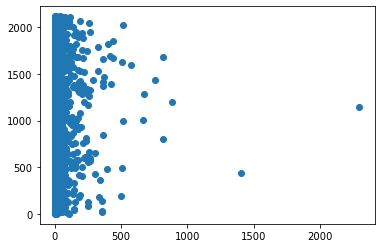

In [63]:
plt.scatter(annual_counts, range(0, len(annual_counts)))

In [64]:
average_count = np.mean(np.array(annual_counts))
median_count = np.median(np.array(annual_counts))

print(average_count)
print(median_count)

34.122699386503065
11.0


In [65]:
high_low =[]
for count in annual_counts:
    if count >= median_count:
        high_low.append(1) #1 indicates high counts
    else:
        high_low.append(0)

In [66]:
all_data["high_low"] = high_low

In [67]:
#separate the other attributes from the predicting attribute
x = all_data.drop("Average Annual Count",axis=1)
x = x.drop("Age-Adjusted Incidence Rate([rate note]) - cases per 100,000", axis = 1) #dropping extra predictive variables
x = x.drop("Percent of Cases with Late Stage", axis = 1)

y = all_data["high_low"]
y = y.to_list()

# y = target array

In [68]:
def response_acc(predictions, answers):
    TP, TN, FP, FN = 0, 0, 0, 0
    for i in range(len(answers)):
        if predictions[i] == answers[i]:
            if predictions[i] == 1:
                #If counts are high, and predicts high
                TP += 1
            else:
                #If counts are low and predicts low
                TN += 1
        elif answers[i] == 1 and predictions[i] == 0:
            #if counts are high but predicts low
            FN += 1
        else: 
            #if counts are low but predicts high
            FP += 1 
    return (TP, TN, FP, FN)

def precision(TP, FP):
    if TP + FP != 0:
        return TP /(TP + FP)
    return 0
def recall(TP, FN):
    if TP + FN != 0:
        return TP / (TP + FN)
    return 0
def f1_score(precision, recall):
    if precision + recall != 0:
        return (2*precision*recall)/(precision + recall)
    return 0
def accuracy(TP, TN, FP, FN):
    if TP + TN + FP + FN != 0:
        return (TP + TN)/(TP + TN + FP + FN)
    return 0

In [73]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model2 = BernoulliNB()
model2.fit(x_train, y_train) 

train_predictions = model2.predict(x_train)
test_predictions = model2.predict(x_test)

TP_train, TN_train, FP_train, FN_train = response_acc(train_predictions, y_train)
TP_test, TN_test, FP_test, FN_test = response_acc(test_predictions, y_test)

train_accuracy = accuracy(TP_train, TN_train, FP_train, FN_train)
test_accuracy = accuracy(TP_test, TN_test, FP_test, FN_test)

train_f1 = f1_score(precision(TP_train, FP_train), recall(TP_train, FN_train))
test_f1 = f1_score(precision(TP_test, FP_test), recall(TP_test, FN_test))

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print("Training f1 score:", train_f1)
print("Test f1 score:", test_f1)

Training accuracy: 1.0
Test accuracy: 1.0
Training f1 score: 1.0
Test f1 score: 1.0


In [74]:
#implementing Kfold over 10 folds
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

model = BernoulliNB()

training_accuracies = []
testing_accuracies = []

for train_index, test_index in kf.split(x, y):
    X_train = np.array(x)[train_index]
    X_test =  np.array(x)[test_index]
    y_train = np.array(y)[train_index]
    y_test = np.array(y)[test_index]
    
    model.fit(X_train, y_train)
    test_predictions = model.predict(X_test) #outputs a vector of y's
    train_predictions = model.predict(X_train)
    
    TP_train, TN_train, FP_train, FN_train = response_acc(train_predictions, y_train)
    TP_test, TN_test, FP_test, FN_test = response_acc(test_predictions, y_test)
    
    training_accuracies.append(accuracy(TP_train, TN_train, FP_train, FN_train))
    testing_accuracies.append(accuracy(TP_test, TN_test, FP_test, FN_test))

    
print(training_accuracies)
print(testing_accuracies)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


## it appears as though our data is not valuable for predicting high or low rates of breast cancer... lets try visualizing

### Distribution of Annual Average Late stage breast cancer incidences:

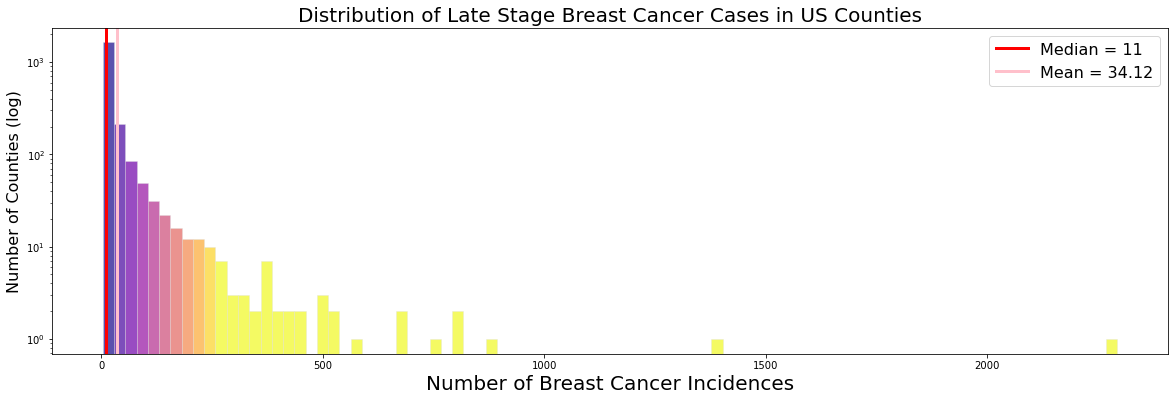

In [75]:
plt.figure(figsize = (20,6))
n, bins, patches = plt.hist(annual_counts, bins=90, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

bins = bins.astype('int') # it MUST be integer
# Good old loop. Choose colormap of your taste
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.plasma(bins[i]))
    
plt.yscale("log")

plt.xlabel("Number of Breast Cancer Incidences", fontsize = 20)
plt.ylabel("Number of Counties (log)", fontsize = 16)
plt.title("Distribution of Late Stage Breast Cancer Cases in US Counties", fontsize = 20)

plt.axvline(x=median_count, ymin=0,ymax=1, c="red", label="Median = 11", linewidth=3)
plt.legend(loc="upper right", fontsize = 16)
plt.axvline(x=average_count, ymin=0,ymax=1, c="Pink", label="Mean = 34.12", linewidth=3)
plt.legend(loc="upper right", fontsize = 16)

plt.show()

Text(0.5, 1.0, 'Case Incidence Counts vs. Poverty Rates')

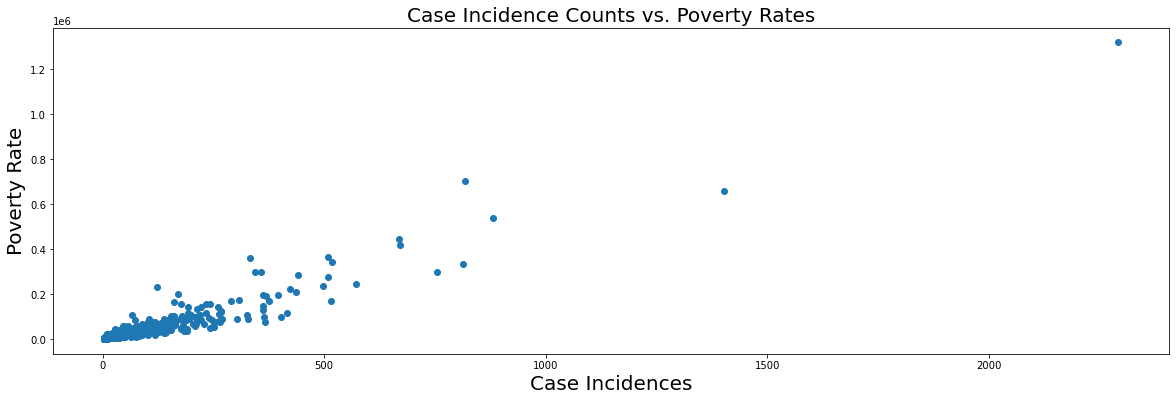

In [76]:
plt.figure(figsize = (20,6))
plt.scatter(annual_counts, all_data["POVALL_2019"])

plt.xlabel("Case Incidences", fontsize = 20)
plt.ylabel("Poverty Rate", fontsize = 20)
plt.title("Case Incidence Counts vs. Poverty Rates", fontsize = 20)

Text(0.5, 1.0, 'Case Incidence Counts vs. Population 2020')

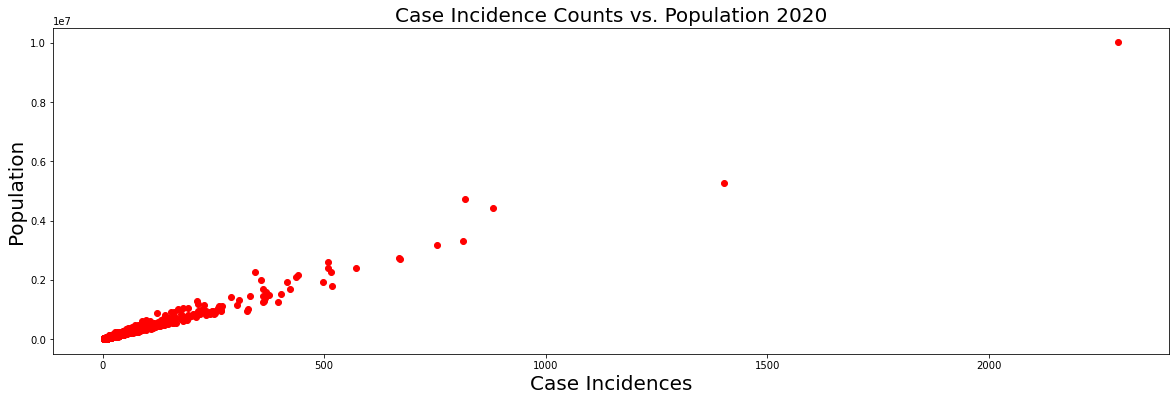

In [77]:
#avg annual count vs. population

plt.figure(figsize = (20,6))
plt.scatter(annual_counts, all_data["Population 2020"], color = "r")

plt.xlabel("Case Incidences", fontsize = 20)
plt.ylabel("Population", fontsize = 20)
plt.title("Case Incidence Counts vs. Population 2020", fontsize = 20)

Text(0.5, 1.0, 'Case Incidence Counts vs. Poverty Rates')

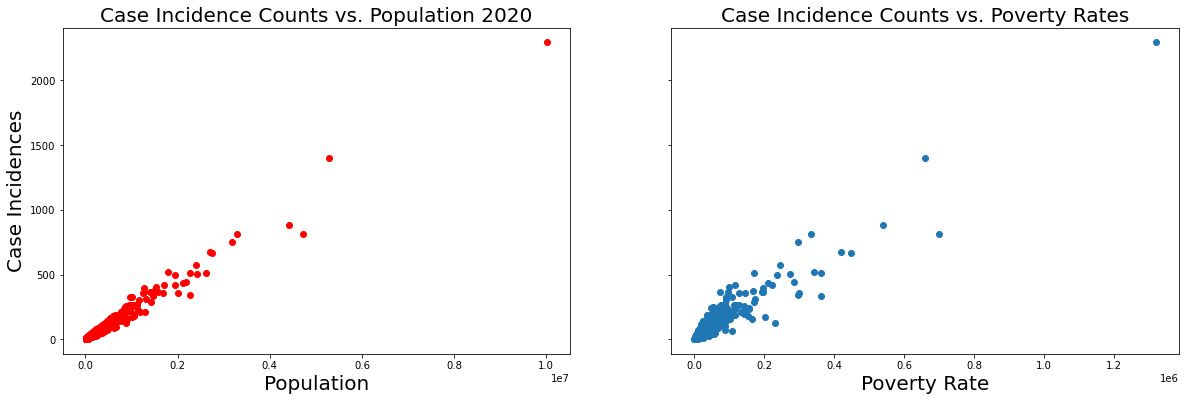

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6), sharey=True)

ax1.scatter(all_data["Population 2020"], annual_counts, color = "r")

ax1.set_ylabel("Case Incidences", fontsize = 20)
ax1.set_xlabel("Population", fontsize = 20)
ax1.set_title("Case Incidence Counts vs. Population 2020", fontsize = 20)

ax2.scatter(all_data["POVALL_2019"], annual_counts)

#ax2.set_ylabel("Case Incidences", fontsize = 20)
ax2.set_xlabel("Poverty Rate", fontsize = 20)
ax2.set_title("Case Incidence Counts vs. Poverty Rates", fontsize = 20)

Text(0.5, 1.0, 'Incidence Rates per 100,000 vs. Poverty Rates')

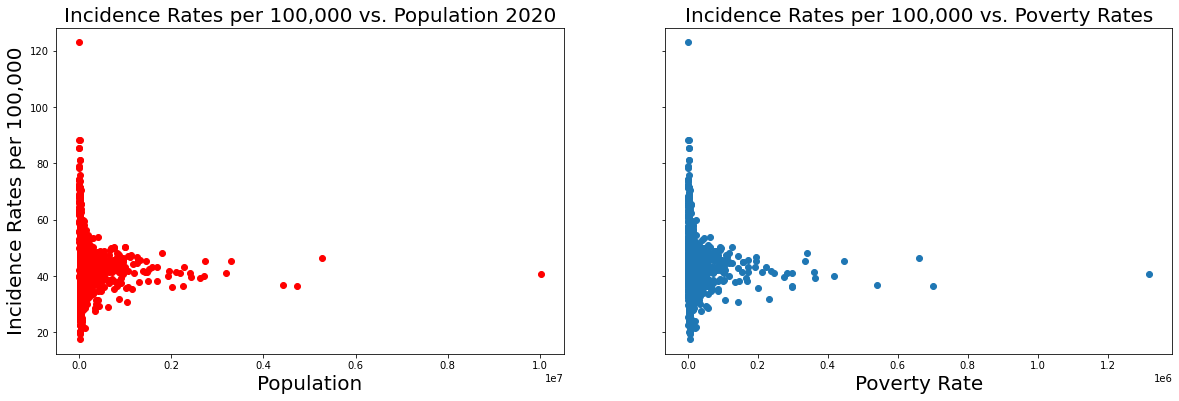

In [79]:
incidence_rates = all_data["Age-Adjusted Incidence Rate([rate note]) - cases per 100,000"].to_list()

fig1, (ax3, ax4) = plt.subplots(1, 2, figsize = (20,6), sharey=True)

ax3.scatter(all_data["Population 2020"],  incidence_rates, color = "r")

ax3.set_ylabel("Incidence Rates per 100,000", fontsize = 20)
ax3.set_xlabel("Population", fontsize = 20)
ax3.set_title("Incidence Rates per 100,000 vs. Population 2020", fontsize = 20)

ax4.scatter(all_data["POVALL_2019"], incidence_rates)

#ax4.set_ylabel("Incidence Rates per 100,000", fontsize = 20)
ax4.set_xlabel("Poverty Rate", fontsize = 20)
ax4.set_title("Incidence Rates per 100,000 vs. Poverty Rates", fontsize = 20)

# Running a PCA....

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(all_data.drop("high_low", axis = 1))

PCA(n_components=10)

[0.9977441372453809, 0.0017303644176992334, 0.0005254957810692022, 1.1851303577964593e-09, 5.455575669021499e-10, 4.207977094802114e-10, 1.7441145034578054e-10, 1.5070508832357555e-10, 7.0887084361265e-11, 8.356094554590712e-12]


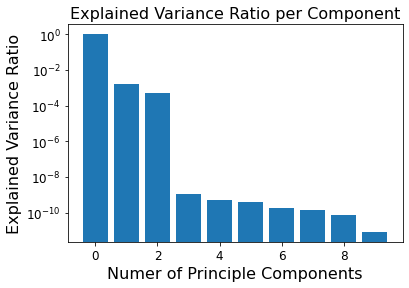

In [81]:
EVR = pca.explained_variance_ratio_ #gives percentage of variance explained by each of the variables
evr_values = [x for x in EVR]
print(evr_values)
plt.bar(range(0, len(evr_values)), evr_values)
plt.yscale("log")

plt.title("Explained Variance Ratio per Component", fontsize = 16)
plt.ylabel("Explained Variance Ratio", fontsize = 16)
plt.xlabel("Numer of Principle Components", fontsize = 16)
plt.tick_params(axis='both', labelsize=12)

In [82]:
explained_variance = np.sum(evr_values[:2])
print(explained_variance*100, "percent of the variance in the data is explained by the first two components.")

99.94745016630802 percent of the variance in the data is explained by the first two components.


In [83]:
X_pca = pca.transform(all_data.drop("high_low", axis = 1))

In [84]:
import scipy.stats as stats
X_z = np.array(stats.zscore(all_data.drop("high_low", axis = 1)))

X_z_pca = pca.fit_transform(X_z)

Text(0.5, 1.0, 'X_z_PCA Component 1 vs. 2')

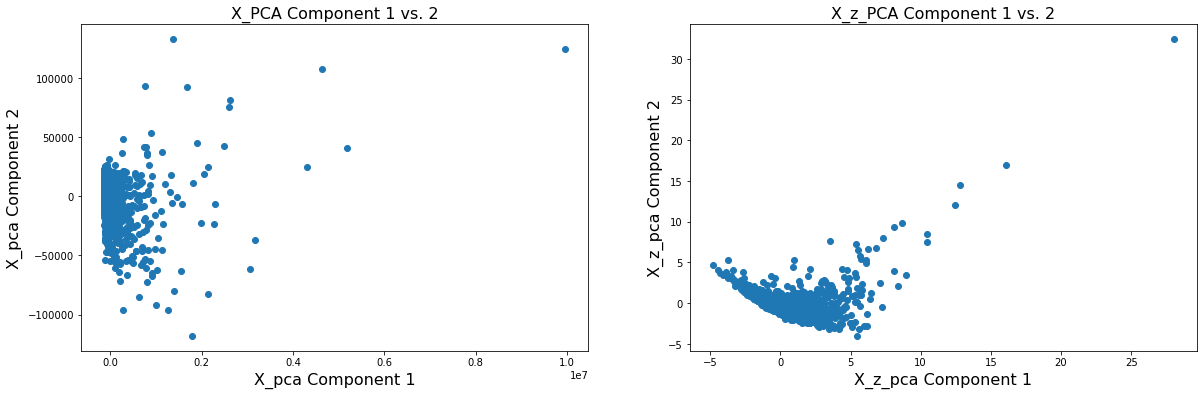

In [85]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))

ax1.scatter(X_pca[:,[0]], X_pca[:,[1]])
ax1.set_xlabel("X_pca Component 1", fontsize = 16)
ax1.set_ylabel("X_pca Component 2", fontsize = 16)
ax1.set_title("X_PCA Component 1 vs. 2", fontsize = 16)

ax2.scatter(X_z_pca[:,[0]], X_z_pca[:,[1]])
ax2.set_xlabel("X_z_pca Component 1", fontsize = 16)
ax2.set_ylabel("X_z_pca Component 2", fontsize = 16)
ax2.set_title("X_z_PCA Component 1 vs. 2", fontsize = 16)

